In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:

df = pd.read_csv('C:\\Users\\Public\\sendy_machine_learning\\Sendy.csv') 

In [36]:
df

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,0,3,0,9,5,9,9,5,9,9,...,9,5,10,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,0,3,1,12,5,11,12,5,11,12,...,12,5,12,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,0,3,0,30,2,12,30,2,12,30,...,30,2,1,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,0,3,0,15,5,9,15,5,9,15,...,15,5,10,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,0,1,1,13,1,9,13,1,9,13,...,13,1,10,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0,3,1,20,3,3,20,3,3,20,...,20,3,4,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,9
21197,0,3,0,13,6,10,13,6,10,13,...,13,6,10,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,770
21198,0,3,0,7,4,5,7,4,5,7,...,7,4,6,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,2953
21199,0,1,1,4,3,9,4,3,9,4,...,4,3,10,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,1380


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  int64  
 1   User Id                                    21201 non-null  int64  
 2   Vehicle Type                               21201 non-null  int64  
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  int64  
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [19]:
df.isnull().sum()

Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat                                   0
Pickup Long  

**Encoding**

In [55]:
df

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,0,3,0,9,5,9,9,5,9,9,...,9,5,10,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,0,3,1,12,5,11,12,5,11,12,...,12,5,12,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,0,3,0,30,2,12,30,2,12,30,...,30,2,1,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,0,3,0,15,5,9,15,5,9,15,...,15,5,10,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,0,1,1,13,1,9,13,1,9,13,...,13,1,10,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0,3,1,20,3,3,20,3,3,20,...,20,3,4,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,9
21197,0,3,0,13,6,10,13,6,10,13,...,13,6,10,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,770
21198,0,3,0,7,4,5,7,4,5,7,...,7,4,6,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,2953
21199,0,1,1,4,3,9,4,3,9,4,...,4,3,10,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,1380


In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Order No'] = label_encoder.fit_transform(df['Order No'])
df['User Id'] = label_encoder.fit_transform(df['User Id'])
df['Vehicle Type'] = label_encoder.fit_transform(df['Vehicle Type'])
df['Personal or Business'] = label_encoder.fit_transform(df['Personal or Business'])
df['Rider Id'] = label_encoder.fit_transform(df['Rider Id'])


In [25]:
df.rename(columns={'Placement - Time2': 'Placement Time'}, inplace=True)

In [ ]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Arrival at Destination - Time'] = df['Arrival at Destination - Time'].apply(converttohour)


In [ ]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Placement - Time'] = df['Placement - Time'].apply(converttohour)

In [24]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Confirmation - Time'] = df['Confirmation - Time'].apply(converttohour)

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [33]:
df.describe()

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.0,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,0.0,2.752182,0.180039,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.0,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,0.0,3.000000,0.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,0.0,3.000000,0.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,0.0,3.000000,0.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,0.0,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [29]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_col = df.select_dtypes(include=['object']).columns

print("Numerical Col:", numerical_cols)
print("Categorical Col:", categorical_col)

Numerical Col: Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')
Categorical Col: Index(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time'],
      dtype='object')


In [37]:
df.columns

Index(['Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival'],
      dtype='object')

**Cleaning Data**

In [53]:
df.dtypes

Vehicle Type                                   int32
Platform Type                                  int64
Personal or Business                           int32
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                               int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                            int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                       int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                  int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                  int64
Distance (KM)                                 

**Changing data type**

In [51]:
def extract_hour(time_str):
    # Check if the value is a string before splitting
    if isinstance(time_str, str):
        return int(time_str.split(':')[0])  # Extract the hour part
    else:
        return time_str 

In [52]:
time_columns = ["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", 
                "Pickup - Time", "Arrival at Destination - Time"]

for col in time_columns:
    df[col] = df[col].apply(extract_hour)

**Drop Columns**

In [11]:
df.drop(columns=["Order No", "User Id", "Rider Id"], inplace=True)

In [7]:
df.drop(columns=['Precipitation in millimeters'], inplace = True)

In [8]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)

**Comparing variables**

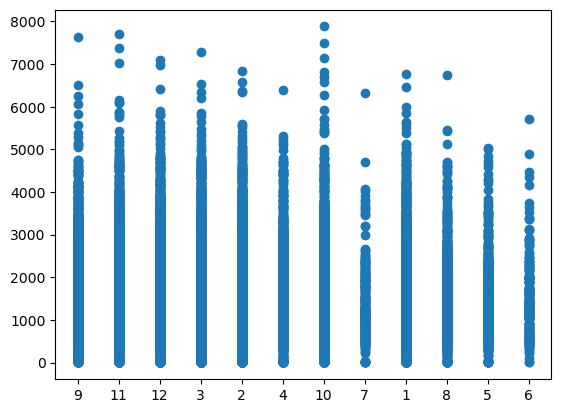

In [40]:
plt.scatter(df['Placement - Time'],df['Time from Pickup to Arrival'])

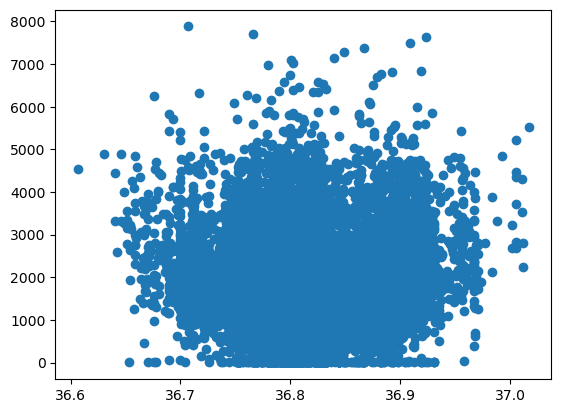

In [ ]:
plt.scatter(df['Destination Long'],df['Time from Pickup to Arrival'])

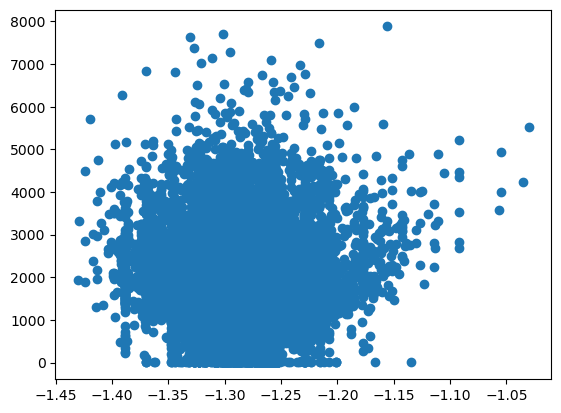

In [41]:
plt.scatter(df['Destination Lat'],df['Time from Pickup to Arrival'])

**Correlation Matrix**

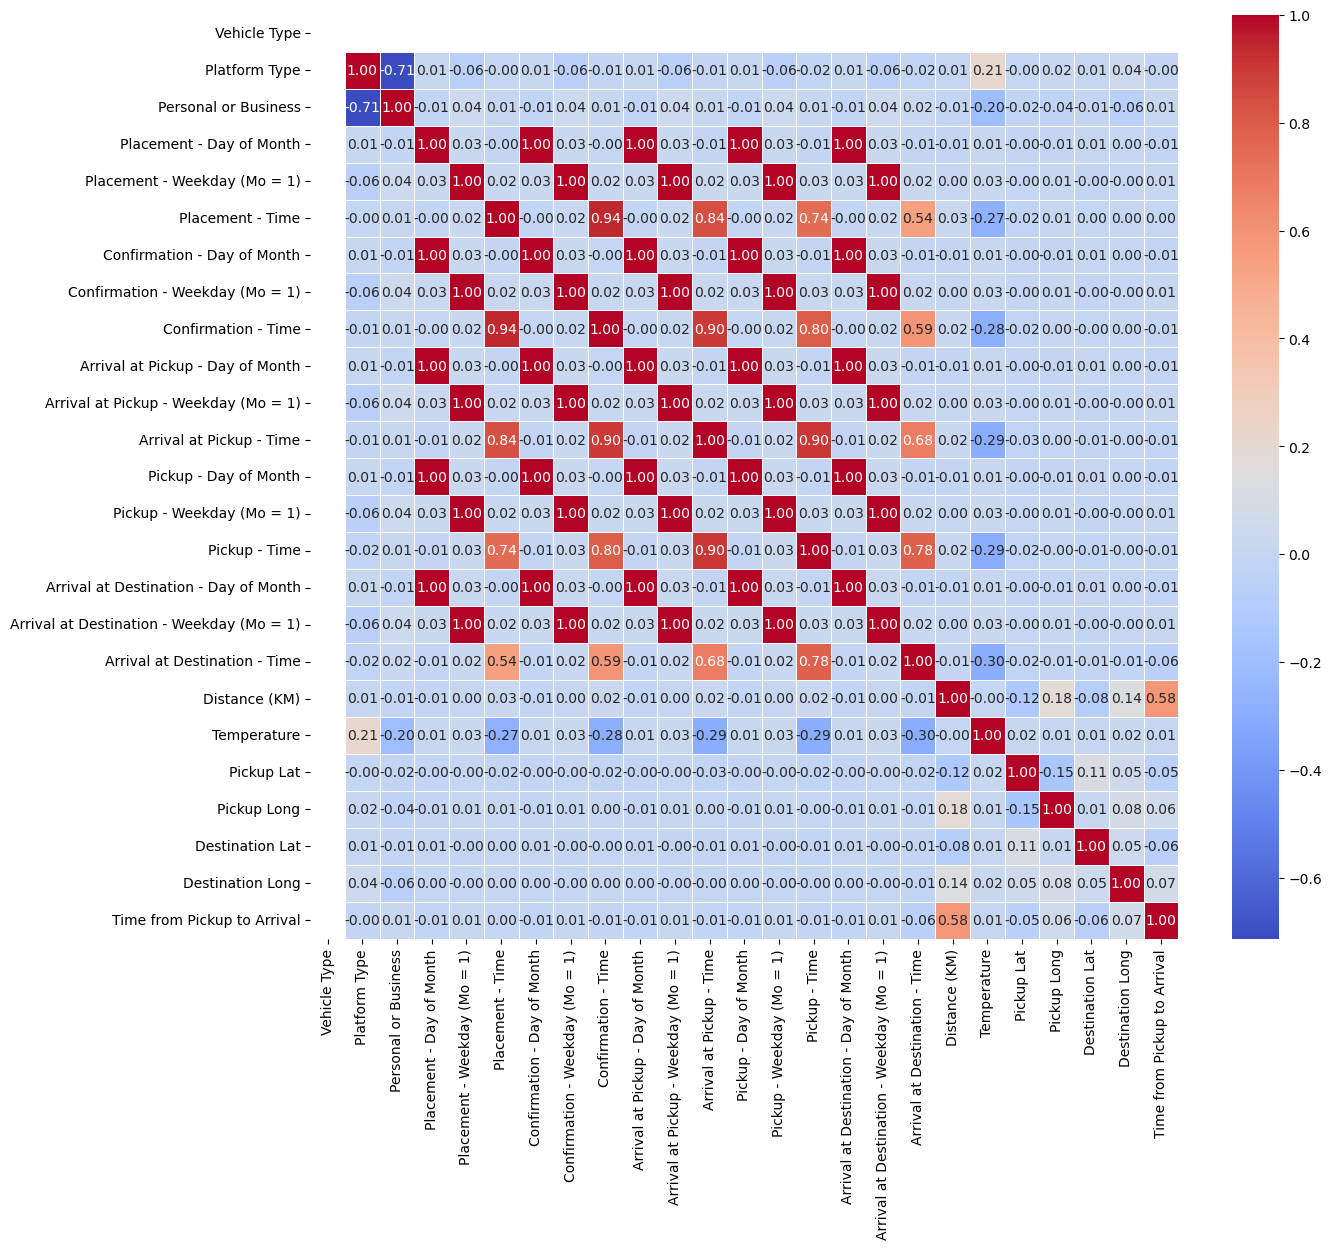

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


**Select Features and the Target**

In [67]:
X = df.drop(columns=["Time from Pickup to Arrival"])
y = df["Time from Pickup to Arrival"]

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)  # Make predictions

In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 644173.6226293108
R-squared: 0.3367991061204214
